In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import svm

**load the data**

In [2]:
data_path = "../data/Iris.csv"
df = pd.read_csv(data_path,index_col="Id")

**initialize the weights**

In [3]:
w = (svm.init_wights(3,len(list(df.columns)[:-1]))) /4.0
w.shape

(3, 5)

In [4]:
w

array([[ 0.09208586, -0.06250541,  0.03960142,  0.06901368,  0.00032739],
       [ 0.02311856, -0.03430034,  0.03514337, -0.03943625,  0.07169111],
       [-0.04897545, -0.10307696,  0.12599349, -0.05180653,  0.04198965]])

**Prepare the data to fit the model**

In [5]:
st_ont_dict = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
data = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
data = np.concatenate([data,np.ones((data.shape[0],1))], axis=1)
df['label'] = list(map( lambda x:st_ont_dict[x],df['Species'] ))

In [6]:
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,label
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0
2,4.9,3.0,1.4,0.2,Iris-setosa,0
3,4.7,3.2,1.3,0.2,Iris-setosa,0


**Prediction with weston watkins mc-svm**

**split the data**

In [6]:
x_train,x_test,y_train,y_test = train_test_split(data, df['label'],random_state=42,test_size=.1)

In [7]:
x_train.shape

(135, 5)

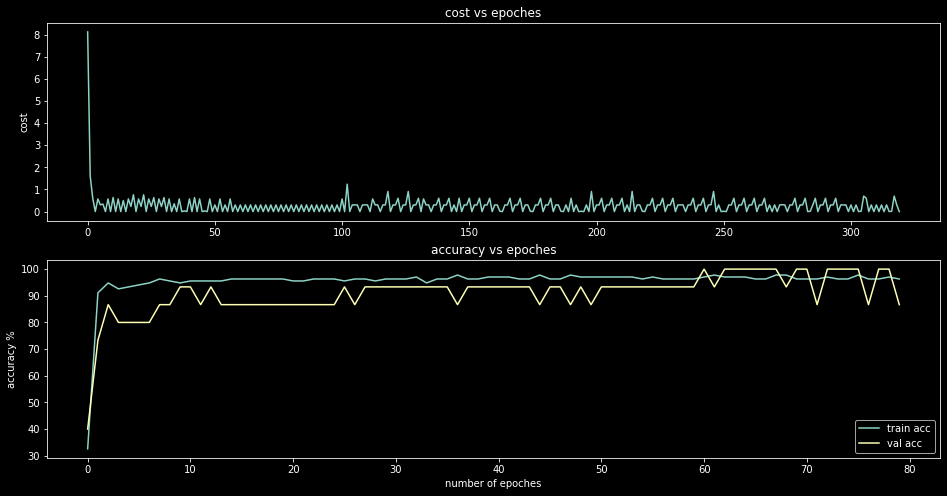

In [7]:
weight_history ,costs , train_acc , test_acc = svm.epoch_minpatch(2*1000, w, 
        x_train.T, y_train,
        x_test.T, y_test,
        batch_size=40
        ,optimizer="GD"
        ,alpha=0.001,lambd=.7)

with plt.style.context('dark_background'):
    l = 1000/40
    svm.eval(train_acc[::int(l)],test_acc[::int(l)],costs[::int(l)],text2='val acc')

In [12]:
train_acc[-2], test_acc[-2]

(99.25925925925925, 100.0)

In [16]:
out = svm.predict(weight_history[len(train_acc)-2], data.T)
labels = df.label
np.sum(out==labels) / len(labels)

0.9933333333333333

In [21]:
# save the weights
np.save("weights",weight_history[len(train_acc)-2])

# Conclusion

> the result is very good using weston watkins apraoch.